<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Tensorflow_learning_at_Udacity/blob/master/4_predicting_co2_emissions_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### watch video link  here [predict_co2_emissions_with_tf](https://www.youtube.com/watch?v=-vHQub0NXI4)<br>
### We could download the data set from the IBM link in the linear model notebook in IBM Cognitive folder

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
from __future__ import absolute_import, division, print_function

import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

print('tensorflow version',tf.__version__)
print('All imports ready!')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


tensorflow version 2.2.0
All imports ready!


## The Auto-MPG Data Set:

This data set is available for free at the UCI Machine Learning Repository...

### There are two ways to download this file...<br>
1. Using the _keras.utils.get_file_ command

In [4]:
data_path =  keras.utils.get_file('auto-mpg.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
data_path

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [5]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model_Year','Origin']

In [6]:
auto_df = pd.read_csv(data_path, names=column_names, na_values='?',comment='\t', sep=' ', skipinitialspace=True)

In [7]:
auto_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
auto_df.shape

(398, 8)

### The second way to download the data set is

2. Using the _!wget_ command line command.<br>
Here we simply copy the url of the page where the data set is available and read it into a pandas data frame

In [9]:
!wget auto_df.csv http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2020-07-21 14:00:46--  http://auto_df.csv/
Resolving auto_df.csv (auto_df.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘auto_df.csv’
--2020-07-21 14:00:46--  http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving mlr.cs.umass.edu (mlr.cs.umass.edu)... 128.119.246.96
Connecting to mlr.cs.umass.edu (mlr.cs.umass.edu)|128.119.246.96|:80... failed: Connection timed out.
Retrying.

--2020-07-21 14:01:18--  (try: 2)  http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Connecting to mlr.cs.umass.edu (mlr.cs.umass.edu)|128.119.246.96|:80... failed: Connection timed out.
Retrying.

--2020-07-21 14:01:52--  (try: 3)  http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Connecting to mlr.cs.umass.edu (mlr.cs.umass.edu)|128.119.246.96|:80... ^C


In [11]:
#auto_df = pd.read_csv("auto-mpg.data",names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True )

In [12]:
auto_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [13]:
auto_df.shape

(398, 8)

## Checking to confirm the right data types per column

Let's check that the columns are of the right data types

In [14]:
auto_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model_Year        int64
Origin            int64
dtype: object

## Checking for NaN or missing values

Next let's check for unknown or NaN values

In [15]:
auto_df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64

With just 6 missing values in the Horsepower column, we can just go ahead and drop them, as it won't affect the prediction since 6 out of 398 is minimal.

In [16]:
auto_df.dropna(axis=0, inplace=True)

Let's check again

In [17]:
auto_df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64

let's confirm the new shape of our data set

In [18]:
auto_df.shape

(392, 8)

## Using One-Hot-Encoding on Origin Column

It appears that the the origin column has numeric categorical data, let's inspect that

In [19]:
auto_df.Origin.unique()

array([1, 3, 2])

Let's One-hot-endode the origin column in to the respective countries of origin, using the pd.get_dummies method<br>
1. America<br>
2. Europe<br>
3. Japan<br>
Then we can delete the origin column after that.

In [20]:
dummies = pd.get_dummies(auto_df.Origin)
dummies.columns = ['America','Europe','Japan']
dummies.head()

,America,Europe,Japan
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Next we need to join or concat dummies to auto df...
Let's first reset both indexes

In [21]:
auto_df.reset_index(drop=True, inplace=True)
dummies.reset_index(drop=True, inplace=True)

In [22]:
auto_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [23]:
dummies.head()

,America,Europe,Japan
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Then we join them using the concat function and setting axis to 1

In [24]:
auto_df = pd.concat([auto_df, dummies], axis=1)

In [25]:
auto_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin,America,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,1,0,0


Finally, let's drop origin column since we have the dummies appended already

In [26]:
auto_df.drop('Origin', axis=1, inplace=True)

In [27]:
auto_df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,America,Europe,Japan
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
388,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
391,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


## Splitting The Data into Train and Test Sets

Next we split the data set into Train and Test data sets:- 80, 20 split

In [28]:
train_data = auto_df.sample(frac=0.8, random_state=0)
test_data = auto_df.drop(train_data.index)

In [29]:
print('len train_data is {}, len test_data is {}'.format(train_data.shape[0], test_data.shape[0]))

len train_data is 314, len test_data is 78


**Let's inspect the data**<br>
have a quick look at the joint distribution of a few pairs of columns from the training data set

<Figure size 1440x1152 with 0 Axes>

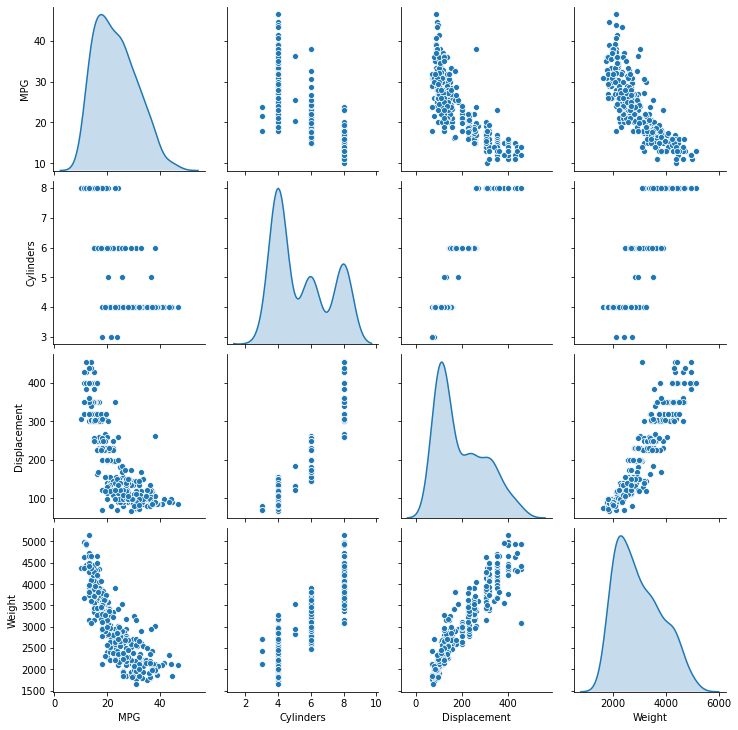

In [30]:
plt.figure(figsize=(20, 16))
sns.pairplot(train_data[['MPG','Cylinders','Displacement','Weight']], diag_kind='kde')

In [31]:
train_data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,America,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


## Using the .pop() method to split the label from the features

Next, let's split features from labels. We want the features of both train and test sets to be split from the labels(MPG)

In [32]:
train_label = train_data.pop('MPG')

In [33]:
test_label = test_data.pop('MPG')

In [34]:
test_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,America,Europe,Japan
9,8,390.0,190.0,3850.0,8.5,70,1,0,0
25,8,360.0,215.0,4615.0,14.0,70,1,0,0
28,8,304.0,193.0,4732.0,18.5,70,1,0,0
31,4,113.0,95.0,2228.0,14.0,71,0,0,1
32,6,232.0,100.0,2634.0,13.0,71,1,0,0


## Normalizing the data using the Z score method

In [35]:
train_data = (train_data - train_data.mean()) / train_data.std()
test_data = (test_data - test_data.mean()) / test_data.std()

## Building The model...

Let's now define a simple method that builds our regression model, with two densely connected hidden layers and<br>
An output layer that returns a single continous value.<br>
The first layer takes the shape of the layer in addition to the neurons and activation function.<br>
The second layer takes the same nn.relu activation function.<br>
The final or output layer has no activation function, meaning it's a linear activation model.
                                                            

In [36]:
def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
        layers.Dense(128, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    model.compile(loss='mse',
                 optimizer= tf.keras.optimizers.RMSprop(0.001),
                 metrics=['mae','mse'])
    
    return model

In [37]:
model = build_model()

### Let's take a look at The summary of our model

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 35,585
Trainable params: 35,585
Non-trainable params: 0
_________________________________________________________________


### Now let's try our model, even though its not been trained lets just check it with some data

In [39]:
ten_examples = train_data[:10]
examples_result = model.predict(ten_examples)
examples_result

# prints the 10 predicted results, seems like our model is working fine.

array([[0.03049166],
       [0.09938917],
       [0.09288025],
       [0.16708557],
       [0.2469222 ],
       [0.0707471 ],
       [0.22561382],
       [0.6143846 ],
       [0.0453519 ],
       [0.05730823]], dtype=float32)

## Training The Model

Train the model for 1000 epochs and record the traning and validation accuracy in the history object

In [40]:
# Display training progress by printing a single dot for each completed epoch.

class printDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')

In [41]:
history = model.fit(train_data, train_label, epochs=1000, validation_split=0.2, verbose=False, callbacks=[printDot()])
print('finished_training')


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

### Let's visualize the over all loss

Text(0, 0.5, 'Loss Magnitude')

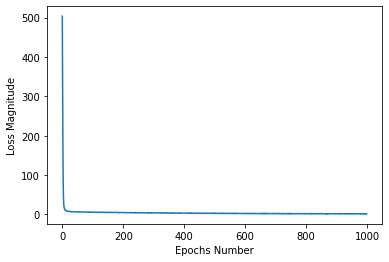

In [42]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs Number')
plt.ylabel('Loss Magnitude')

### Let's cast to a data frame the general loss as well as the validation loss

In [43]:
hist_obj = pd.DataFrame(history.history)
hist_obj['Epoch'] = history.epoch
hist_obj.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,Epoch
990,1.232768,0.714226,1.232768,9.470097,2.249651,9.470097,990
991,1.769162,0.913270,1.769162,9.389517,2.255295,9.389517,991
992,1.397791,0.800276,1.397791,9.788873,2.311973,9.788873,992
993,1.511176,0.787287,1.511176,10.872712,2.368836,10.872712,993
994,1.789821,0.835207,1.789821,10.006146,2.342931,10.006146,994
995,1.273096,0.668196,1.273096,10.246965,2.426275,10.246965,995
996,1.955412,0.895828,1.955412,9.929276,2.420367,9.929276,996
997,1.228186,0.662753,1.228186,10.027120,2.319839,10.027120,997
998,1.720902,0.934010,1.720902,9.607669,2.274261,9.607669,998
999,1.196955,0.645254,1.196955,9.783175,2.292933,9.783175,999


### seems like the validation loss for the MAE and MSE is rising, let's visualize further

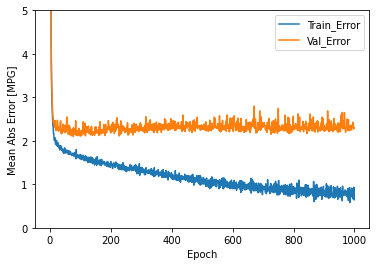

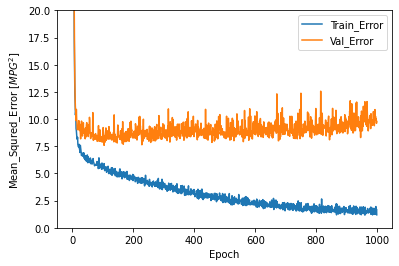

In [46]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train_Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val_Error')
    plt.legend()
    plt.ylim([0, 5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean_Squred_Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train_Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val_Error')
    plt.legend()
    plt.ylim([0, 20])
    
plot_history(history)

### Clearly the validation loss for both MAE and MSE seem like its rising, and is a classic result of over-fitting.
### Let's use the early-stopping function to fix this.


The  EarlyStopping function would stop the training if a set number of epochs occur and the model is not improving. This set number is called the patience parameter. We will set the condition of the EarlyStopping to monitor the validation loss of the model and stop training if loss does not improve in 10 epochs.

In [47]:
# The patience parameter is the amount of epochs to check for improvement

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [48]:
model2 = build_model()

history = model2.fit(train_data, train_label, epochs=1000, validation_split=0.2, verbose=False, callbacks=[early_stop, printDot()])
print('finished_training')


...............................................finished_training


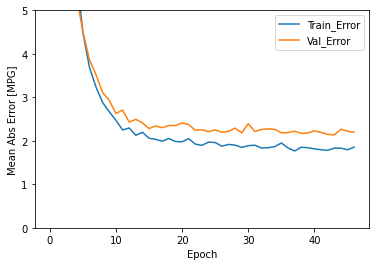

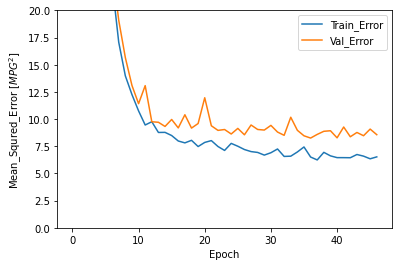

In [49]:
plot_history(history)

In [50]:
hist_obj = pd.DataFrame(history.history)
hist_obj['Epoch'] = history.epoch
hist_obj.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,Epoch
37,6.242121,1.766848,6.242121,8.590442,2.220814,8.590442,37
38,6.940213,1.853230,6.940213,8.875804,2.171864,8.875804,38
39,6.617660,1.841702,6.617660,8.926886,2.177413,8.926886,39
40,6.454346,1.815564,6.454346,8.275486,2.229662,8.275486,40
41,6.452721,1.794605,6.452721,9.270513,2.193632,9.270513,41
42,6.444991,1.780471,6.444991,8.373162,2.146967,8.373162,42
43,6.741483,1.832460,6.741483,8.769280,2.136721,8.769280,43
44,6.591789,1.832282,6.591789,8.469252,2.267005,8.469252,44
45,6.346996,1.793950,6.346996,9.079325,2.219802,9.079325,45
46,6.523790,1.854755,6.523790,8.564482,2.197492,8.564482,46


Let's see how our model is doing on generally, after the early stopping we did above

In [51]:
loss, mae, mse = model2.evaluate(test_data, test_label, verbose=0)

print('Testing set MAE is: %.2f' % mae, 'and MSE is: %.2f' % mse)

Testing set MAE is: 1.94 and MSE is: 6.28


with an MSE of 5.90, our model is doing really well generally.

### checking the RMSE

Remember the RMSE is the square root of the MSE and can be compared to the range of the target label 

In [52]:
RMSE = mse**0.5
RMSE

2.506096844262461

In [53]:
test_range = test_label.max() - test_label.min()
test_range

35.3

** Let's compare our RMSE as a percentage of the range of the target variable to see how our model performs**

In [54]:
RMSE_Range = (RMSE / test_range) * 100
RMSE_Range

7.099424487995641

This means our model error is just within 7% accuracy of the range of the target label... not bad at all.

## Let's make some predictions

In [55]:
test_predict = model2.predict(test_data).flatten()  # falttened so we can plot it easily

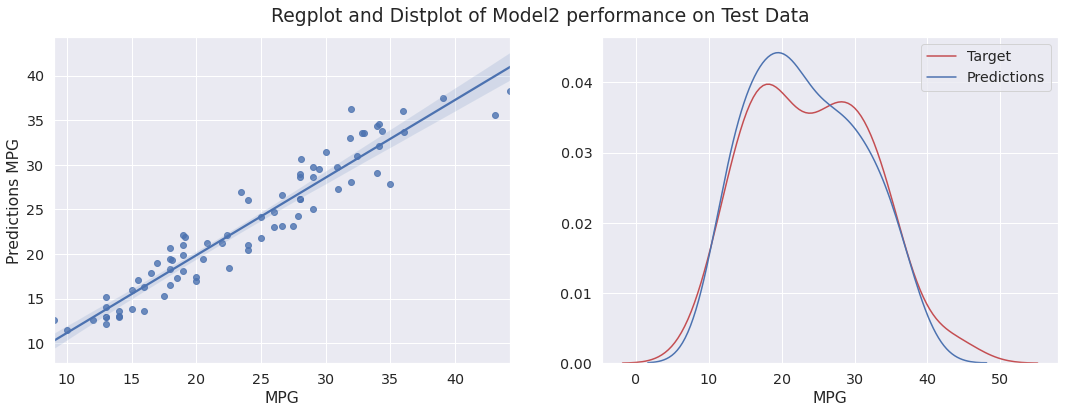

In [56]:
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.3)
plt.suptitle('Regplot and Distplot of Model2 performance on Test Data', y=0.95)

plt.subplot(121)
sns.regplot(test_label, test_predict)
plt.ylabel('Predictions MPG')

plt.subplot(122)
sns.distplot(test_label, color='r', label='Target', hist=False)
sns.distplot(test_predict, color='b', label='Predictions', hist=False)
plt.show()

By and large, it looks like our model is doing really well... Let's take a look at The error distribution.